In [2]:
import yfinance as yf 
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import talib
import numpy as np 
import FinanceDataReader as fdr
import warnings
warnings.filterwarnings('ignore')


# Define Function

In [3]:
# 함수 정의 
# Fast %K ((현재가 - n기간 중 최저가)/(n기간 중 최고가 - n 기간 중 최저가)) * 100

def get_stochastic_fast_k(close_price, low, high, n =5):
    fast_k = (close_price - low.rolling(window=n).min())/(high.rolling(window=n).max()
                                                         - low.rolling(window=n).min())*100
    return fast_k
    

In [4]:
# Slow %K  = Fast %K의 m기간 이동평균(SMA) = # Fast % D
def get_stochastic_slow_k(fast_k, n=3):
    slow_k = fast_k.rolling(window=n).mean()
    return slow_k

In [5]:
# Slow %D  = Slow %K의 t기간 이동평균(SMA)
def get_stochastic_slow_d(slow_k, n=3):
    slow_d = slow_k.rolling(window=n).mean()
    return slow_d

# data load

In [6]:
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [7]:
df_krx = df_krx.dropna()
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [8]:
# data_set 
df_select = df_krx[['Symbol','Name','Sector','Industry']]
df_select.head()

,Symbol,Name,Sector,Industry
0,060310,3S,전자부품 제조업,반도체 웨이퍼 캐리어
1,095570,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)"
2,006840,AK홀딩스,기타 금융업,지주사업
3,054620,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션
4,265520,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비


In [9]:
# stock_info_detail
raw_df=fdr.DataReader('005930','2022-01-01')
raw_df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205


# sample

In [10]:
# seriese 정의 
high_ = raw_df.High
low_ = raw_df.Low
close_ = raw_df.Close

In [11]:
df = pd.DataFrame()
df['fast_k']=get_stochastic_fast_k(close_,low_,high_)
df['fast_k']

Date
2022-01-03          NaN
2022-01-04          NaN
2022-01-05          NaN
2022-01-06          NaN
2022-01-07    55.882353
                ...    
2022-06-15    10.000000
2022-06-16    16.666667
2022-06-17    11.764706
2022-06-20    14.634146
2022-06-21    13.513514
Name: fast_k, Length: 114, dtype: float64

<AxesSubplot:xlabel='Date'>

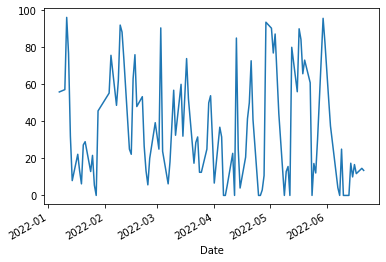

In [12]:
df['fast_k'].plot()

In [13]:
df['slow_k'] = get_stochastic_slow_k(df['fast_k'])
df['slow_k']

Date
2022-01-03          NaN
2022-01-04          NaN
2022-01-05          NaN
2022-01-06          NaN
2022-01-07          NaN
                ...    
2022-06-15     9.130435
2022-06-16    14.685990
2022-06-17    12.810458
2022-06-20    14.355173
2022-06-21    13.304122
Name: slow_k, Length: 114, dtype: float64

In [15]:
df['slow_d']=get_stochastic_slow_d(df['slow_k'])
df['slow_d']

Date
2022-01-03          NaN
2022-01-04          NaN
2022-01-05          NaN
2022-01-06          NaN
2022-01-07          NaN
                ...    
2022-06-15     7.753623
2022-06-16     9.871176
2022-06-17    12.208961
2022-06-20    13.950540
2022-06-21    13.489917
Name: slow_d, Length: 114, dtype: float64

<AxesSubplot:xlabel='Date'>

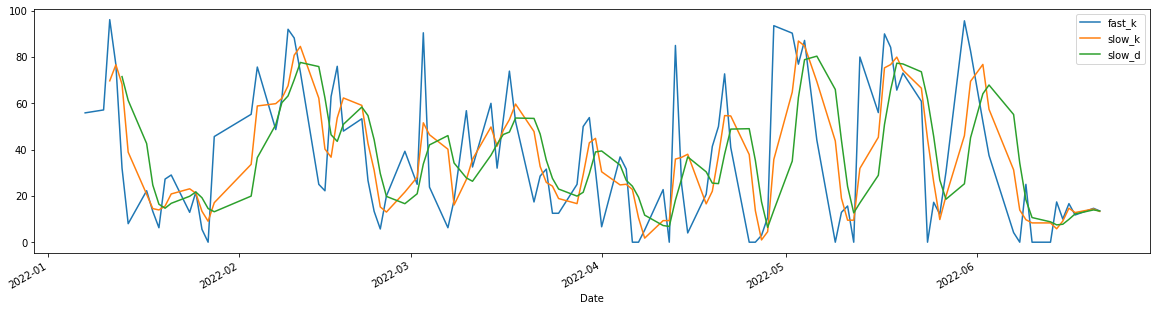

In [16]:
df.plot(figsize=(20,5))

# Trade BackTesting
### 1. Slow %D 80이상 매도 20이하 매수 
### 2. Slow %K 80이상 매도 20이하 매수 
### 3. Fast % k 80이상 매도 20이하 매수 
 

In [35]:

###################################
## Slow %D 80이상 매도 20이하 매수 ##
#####################################

###############
## 삼성 전자 ##
###############

#데이터 로드 
raw_df=fdr.DataReader('005930','2022-01-01').reset_index()

# seriese 정의 
high_ = raw_df.High
low_ = raw_df.Low
close_ = raw_df.Close

raw_df['fast_k'] = get_stochastic_fast_k(close_,low_,high_)
fast_k = raw_df['fast_k']
raw_df['slow_k'] = get_stochastic_slow_k(fast_k)
slow_k = raw_df['slow_k']
raw_df['slow_d'] = get_stochastic_slow_d(slow_k)
slow_d = raw_df['slow_d']

buy_idx = np.where(raw_df['slow_d']<=20)[0] 
sell_idx =np.where(raw_df['slow_d']>=80)[0]

# 이전 action이 buy였으면 공란 
for k in range(len(raw_df)):
    if k in buy_idx:
        raw_df.loc[k,'action'] = 'buy'
    elif k in sell_idx:
        raw_df.loc[k,'action'] = 'sell'
    else:
        raw_df.loc[k,'action'] = ''

rst_df = raw_df.copy()

for k in range(len(rst_df)):
    if k ==0:
        continue      
    if rst_df.loc[k-1,'action'] =='buy':
        rst_df.loc[k,'action'] = 'holding'
    elif rst_df.loc[k,'action'] =='sell':
        rst_df.loc[k+1,'action'] = ''
        
    elif rst_df.loc[k-1,'action'] =='holding':
        rst_df.loc[k,'action'] = 'holding'
    else:
        continue
               
               
rst_df

,Date,Open,High,Low,Close,Volume,Change,fast_k,slow_k,slow_d,action
0,2022-01-03,79400,79800,78200,78600,13502112,0.003831,NaN,NaN,NaN,
1,2022-01-04,78800,79200,78300,78700,12427416,0.001272,NaN,NaN,NaN,
2,2022-01-05,78800,79000,76400,77400,25470640,-0.016518,NaN,NaN,NaN,
3,2022-01-06,76700,77600,76600,76900,12931954,-0.006460,NaN,NaN,NaN,
4,2022-01-07,78100,78400,77400,78300,15163757,0.018205,55.882353,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...
109,2022-06-15,61300,61500,60200,60700,26811224,-0.019386,10.000000,9.130435,7.753623,holding
110,2022-06-16,61300,61800,60500,60900,23394895,0.003295,16.666667,14.685990,9.871176,holding
111,2022-06-17,59400,59900,59400,59800,29053450,-0.018062,11.764706,12.810458,12.208961,holding
112,2022-06-20,59800,59900,58100,58700,34111306,-0.018395,14.634146,14.355173,13.950540,holding


In [39]:

###################################
## Slow %K 80이상 매도 20이하 매수 ##
#####################################

###############
## 삼성 전자 ##
###############

#데이터 로드 
raw_df=fdr.DataReader('005930','2022-01-01').reset_index()

# seriese 정의 
high_ = raw_df.High
low_ = raw_df.Low
close_ = raw_df.Close

raw_df['fast_k'] = get_stochastic_fast_k(close_,low_,high_)
fast_k = raw_df['fast_k']
raw_df['slow_k'] = get_stochastic_slow_k(fast_k)
slow_k = raw_df['slow_k']
raw_df['slow_d'] = get_stochastic_slow_d(slow_k)
slow_d = raw_df['slow_d']

buy_idx = np.where(raw_df['slow_k']<=20)[0] 
sell_idx =np.where(raw_df['slow_k']>=80)[0]

# 이전 action이 buy였으면 공란 
for k in range(len(raw_df)):
    if k in buy_idx:
        raw_df.loc[k,'action'] = 'buy'
    elif k in sell_idx:
        raw_df.loc[k,'action'] = 'sell'
    else:
        raw_df.loc[k,'action'] = ''

rst_df = raw_df.copy()

for k in range(len(rst_df)):
    if k ==0:
        continue      
    if rst_df.loc[k-1,'action'] =='buy':
        rst_df.loc[k,'action'] = 'holding'
    elif rst_df.loc[k,'action'] =='sell':
        rst_df.loc[k+1,'action'] = ''
        
    elif rst_df.loc[k-1,'action'] =='holding':
        rst_df.loc[k,'action'] = 'holding'
    else:
        continue
               
               
rst_df

,Date,Open,High,Low,Close,Volume,Change,fast_k,slow_k,slow_d,action
0,2022-01-03,79400,79800,78200,78600,13502112,0.003831,NaN,NaN,NaN,
1,2022-01-04,78800,79200,78300,78700,12427416,0.001272,NaN,NaN,NaN,
2,2022-01-05,78800,79000,76400,77400,25470640,-0.016518,NaN,NaN,NaN,
3,2022-01-06,76700,77600,76600,76900,12931954,-0.006460,NaN,NaN,NaN,
4,2022-01-07,78100,78400,77400,78300,15163757,0.018205,55.882353,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...
109,2022-06-15,61300,61500,60200,60700,26811224,-0.019386,10.000000,9.130435,7.753623,holding
110,2022-06-16,61300,61800,60500,60900,23394895,0.003295,16.666667,14.685990,9.871176,holding
111,2022-06-17,59400,59900,59400,59800,29053450,-0.018062,11.764706,12.810458,12.208961,holding
112,2022-06-20,59800,59900,58100,58700,34111306,-0.018395,14.634146,14.355173,13.950540,holding


In [88]:

###################################
## Fast %K 80이상 매도 20이하 매수 ##
#####################################

###############
## 삼성 전자 ##
###############

#데이터 로드 
raw_df=fdr.DataReader('005930','2022-01-01').reset_index()

# seriese 정의 
high_ = raw_df.High
low_ = raw_df.Low
close_ = raw_df.Close

raw_df['fast_k'] = get_stochastic_fast_k(close_,low_,high_)
fast_k = raw_df['fast_k']
raw_df['slow_k'] = get_stochastic_slow_k(fast_k)
slow_k = raw_df['slow_k']
raw_df['slow_d'] = get_stochastic_slow_d(slow_k)
slow_d = raw_df['slow_d']

buy_idx = np.where(raw_df['fast_k']<=20)[0] 
sell_idx =np.where(raw_df['fast_k']>=80)[0]

# 이전 action이 buy였으면 공란 
for k in range(len(raw_df)):
    if k in buy_idx:
        raw_df.loc[k,'action'] = 'buy'
    elif k in sell_idx:
        raw_df.loc[k,'action'] = 'sell'
    else:
        raw_df.loc[k,'action'] = ''

rst_df = raw_df.copy()

for k in range(len(rst_df)):
    if k ==0:
        continue      
    if rst_df.loc[k-1,'action'] =='buy': # 이전 시점에 buy면 holding   ## action 
        rst_df.loc[k,'action'] = 'holding'
    elif rst_df.loc[k-1,'action'] =='sell': # 이전 시점에 sell이면 sell_holding  ## action 
        rst_df.loc[k,'action'] = 'sell_holding'
    elif (rst_df.loc[k-1,'action'] =='sell_holding') and(rst_df.loc[k,'action'] =='buy') : # 이전시점이 sell_hlidng면서 현재 buy러 바뀌면 넘기기 
        continue # 포지션 바뀌는 경우 
    elif (rst_df.loc[k-1,'action'] =='holding') and(rst_df.loc[k,'action'] =='sell') : # 포지션 바뀌는 경우 
        continue         
    elif rst_df.loc[k-1,'action'] =='sell_holding': # 이전이 sell_holding 이이고 다음도 같으면 포지션 유지  # position stay
        rst_df.loc[k,'action'] = 'sell_holding'        
    elif rst_df.loc[k-1,'action'] =='holding':  # 이전이 holding 이고 다음도 같으면 포지션 유지 # position stay
        rst_df.loc[k,'action'] = 'holding'
    else:
        continue        
               
rst_df

,Date,Open,High,Low,Close,Volume,Change,fast_k,slow_k,slow_d,action
0,2022-01-03,79400,79800,78200,78600,13502112,0.003831,NaN,NaN,NaN,
1,2022-01-04,78800,79200,78300,78700,12427416,0.001272,NaN,NaN,NaN,
2,2022-01-05,78800,79000,76400,77400,25470640,-0.016518,NaN,NaN,NaN,
3,2022-01-06,76700,77600,76600,76900,12931954,-0.006460,NaN,NaN,NaN,
4,2022-01-07,78100,78400,77400,78300,15163757,0.018205,55.882353,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...
109,2022-06-15,61300,61500,60200,60700,26811224,-0.019386,10.000000,9.130435,7.753623,holding
110,2022-06-16,61300,61800,60500,60900,23394895,0.003295,16.666667,14.685990,9.871176,holding
111,2022-06-17,59400,59900,59400,59800,29053450,-0.018062,11.764706,12.810458,12.208961,holding
112,2022-06-20,59800,59900,58100,58700,34111306,-0.018395,14.634146,14.355173,13.950540,holding


In [44]:
df_sample = rst_df.copy()
df_sample['range'] = df_sample['High']-df_sample['Low']
df_sample[df_sample['action'].isin(['buy','sell'])]

,Date,Open,High,Low,Close,Volume,Change,fast_k,slow_k,slow_d,action,range
6,2022-01-11,78400,79000,78000,78900,13221123,0.011538,96.153846,69.726352,NaN,sell,1000
9,2022-01-14,77700,78100,77100,77300,10096725,-0.007702,8.000000,38.888889,61.272283,buy,1000
24,2022-02-09,74300,74700,74000,74700,9699122,0.016327,92.000000,67.603604,63.209420,sell,700
34,2022-02-23,73800,73800,72800,73000,10397964,-0.005450,13.333333,31.111111,44.296296,buy,1000
39,2022-03-03,72300,73100,72200,72900,13232638,0.016736,90.476190,51.587302,33.783069,sell,900
41,2022-03-07,70000,70600,69900,70100,18617138,-0.019580,6.250000,40.178571,46.064815,buy,700
67,2022-04-13,67300,69000,67200,68700,17378619,0.025373,85.000000,35.909091,18.189793,sell,1800
69,2022-04-15,67200,67300,66500,66600,13176415,-0.013333,4.000000,38.000000,36.858586,buy,800
79,2022-04-29,65100,67600,65000,67400,26190390,0.040123,93.548387,35.734616,13.755610,sell,2600
82,2022-05-04,68000,68400,67500,67900,11505248,0.005926,87.179487,84.808382,78.867160,sell,900


In [91]:
rst_df[rst_df['action'].isin(['buy','sell'])]

,Date,Open,High,Low,Close,Volume,Change,fast_k,slow_k,slow_d,action
6,2022-01-11,78400,79000,78000,78900,13221123,0.011538,96.153846,69.726352,NaN,sell
9,2022-01-14,77700,78100,77100,77300,10096725,-0.007702,8.000000,38.888889,61.272283,buy
24,2022-02-09,74300,74700,74000,74700,9699122,0.016327,92.000000,67.603604,63.209420,sell
34,2022-02-23,73800,73800,72800,73000,10397964,-0.005450,13.333333,31.111111,44.296296,buy
39,2022-03-03,72300,73100,72200,72900,13232638,0.016736,90.476190,51.587302,33.783069,sell
41,2022-03-07,70000,70600,69900,70100,18617138,-0.019580,6.250000,40.178571,46.064815,buy
67,2022-04-13,67300,69000,67200,68700,17378619,0.025373,85.000000,35.909091,18.189793,sell
69,2022-04-15,67200,67300,66500,66600,13176415,-0.013333,4.000000,38.000000,36.858586,buy
79,2022-04-29,65100,67600,65000,67400,26190390,0.040123,93.548387,35.734616,13.755610,sell
84,2022-05-09,66300,66900,66100,66100,11858736,-0.006015,0.000000,43.765711,65.993610,buy


In [81]:
rst_df[80:100]

,Date,Open,High,Low,Close,Volume,Change,fast_k,slow_k,slow_d,action
80,2022-05-02,66600,67600,66500,67300,14106184,-0.001484,90.322581,64.861751,35.049396,sell_holding
81,2022-05-03,67400,68400,67300,67500,14168875,0.002972,76.923077,86.931348,62.509239,
82,2022-05-04,68000,68400,67500,67900,11505248,0.005926,87.179487,84.808382,78.867160,sell
83,2022-05-06,67000,67100,66500,66500,14356156,-0.020619,44.117647,69.406737,80.382156,sell_holding
84,2022-05-09,66300,66900,66100,66100,11858736,-0.006015,0.000000,43.765711,65.993610,
85,2022-05-10,65900,66300,65300,65700,17235605,-0.006051,12.903226,19.006958,44.059802,buy
86,2022-05-11,65500,66300,65200,65700,12330920,0.000000,15.625000,9.509409,24.094026,holding
87,2022-05-12,65200,65500,64900,64900,16414188,-0.012177,0.000000,9.509409,12.675258,holding
88,2022-05-13,65300,66700,65200,66500,14551536,0.024653,80.000000,31.875000,16.964606,sell
89,2022-05-16,67100,67400,66100,66300,11937555,-0.003008,56.000000,45.333333,28.905914,sell_holding


In [89]:
rst_df[80:100]

,Date,Open,High,Low,Close,Volume,Change,fast_k,slow_k,slow_d,action
80,2022-05-02,66600,67600,66500,67300,14106184,-0.001484,90.322581,64.861751,35.049396,sell_holding
81,2022-05-03,67400,68400,67300,67500,14168875,0.002972,76.923077,86.931348,62.509239,sell_holding
82,2022-05-04,68000,68400,67500,67900,11505248,0.005926,87.179487,84.808382,78.867160,sell_holding
83,2022-05-06,67000,67100,66500,66500,14356156,-0.020619,44.117647,69.406737,80.382156,sell_holding
84,2022-05-09,66300,66900,66100,66100,11858736,-0.006015,0.000000,43.765711,65.993610,buy
85,2022-05-10,65900,66300,65300,65700,17235605,-0.006051,12.903226,19.006958,44.059802,holding
86,2022-05-11,65500,66300,65200,65700,12330920,0.000000,15.625000,9.509409,24.094026,holding
87,2022-05-12,65200,65500,64900,64900,16414188,-0.012177,0.000000,9.509409,12.675258,holding
88,2022-05-13,65300,66700,65200,66500,14551536,0.024653,80.000000,31.875000,16.964606,sell
89,2022-05-16,67100,67400,66100,66300,11937555,-0.003008,56.000000,45.333333,28.905914,sell_holding


In [60]:
def get_profit(df):
    final_df = df[df['action'].isin(['buy','sell'])]
    final_df = final_df.reset_index(drop=True)
    trading_cnt = final_df.shape[0]
    
    profit = []
    buy_lst = []
    for idx in range(len(final_df)):
        # 매수 action이 들어올 경우 매수 
        if final_df.action[idx] =='buy':
            buy_price = final_df.Close[idx]
            buy_lst.append(buy_price)
        # 첫 action이 매도인 경우
        elif idx == 0 and final_df.action[idx] =='sell':
            continue
        #그 외의 경우 정상 매도 
        else:
            sell_price = final_df.Close[idx]
            profit.append(-(buy_price) + sell_price) # 음수가 되어야함. 
            # 1 buy_pirce > sell_preice 인경우 비싸게 싸서 싸게 판경우 즉 손실 
            # 2 buy_pirce < sell_preice 인 경우 싸게사서 비싸게 판경우 그래서 이득 
       
    profit_sum = np.sum(profit)
    average_buying = np.mean(buy_lst) # 매수 평단가 
    profit_percentage = round(profit_sum/average_buying,2)
    profit_num = len(profit)
    
    return trading_cnt,profit_sum,profit_num,profit_percentage
    

##

In [20]:
get_profit(rst_df)

(32, -900, 1, -0.01)

In [37]:
get_profit(rst_df) # slow% D 

(3, -9800, 1, -0.14)

In [40]:
get_profit(rst_df) # slow% K = Fast% D 

(5, -5600, 2, -0.08)

In [90]:
get_profit(rst_df) # Fast% K 

(14, -1700, 6, -0.02)

In [ ]:
# 주가유사도 에 따라서 